In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.optimize import minimize
from scipy.special import expit as sigmoid 
# scipy.special has a sigmoid function named expit

In [2]:
data = np.genfromtxt('ex2data2.txt',delimiter=',')
data.shape

(118, 3)

In [3]:
X = data[:,0:-1]
y = data[:,-1]
m = y.size
X.shape,y.shape,m

((118, 2), (118,), 118)

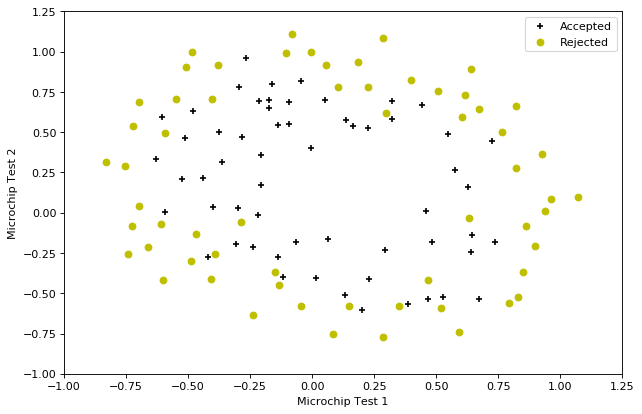

In [4]:
pos = np.nonzero(y==1)
neg = np.nonzero(y==0)
plt.figure(figsize=(9,6),dpi=80)
plt.scatter(X[pos,0],X[pos,1],c='k',marker='+',label = "Accepted")
plt.scatter(X[neg,0],X[neg,1],c='y',marker='o',label = "Rejected")
plt.xlim(xmin = -1, xmax = 1.25)
plt.ylim(ymin=-1, ymax=1.25)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(loc='upper right')
plt.show()

In [5]:
# Mapping the two input features (X1,X2) to Polynomial Features
# The new feature matrix will comprise columns of features such as
# X1, X2, X1^2, X2^2, X1*X2, X1*X2^2 etc upto degree 6
# Also adds the intercept columns of ones to the begining of the feature matrix
def mapFeature(X1,X2):
    degree = 6
    X_new = np.ones((X1.size,1))
    for i in range(1,degree+1):
        for j in range(0,i+1):
            temp = X1**(i-j) * X2**j
            X_new = np.hstack((X_new,temp.reshape(-1,1)))
    return X_new
    

In [6]:
X_new = mapFeature(X[:,0],X[:,1])
r,c = X_new.shape
r,c

(118, 28)

In [7]:
# Initializing Pararmeter Vector Theta to zeros
init_theta = np.zeros(c)
init_theta.shape

(28,)

In [8]:
# Cost Function and Gradient for Regularized Logistic Regression
# Note : We do not regularize Theta[0] (bias term)
def costFunction(t,X,y,lamb):
    m = y.size
    h = sigmoid(X.dot(t))
    J = ((-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))) + ((lamb/(2.0*m)) * sum(t[1:]**2))                         
    grad = (1.0/m)*((X.T).dot(h-y))
    reg_term = np.r_[0,(lamb/float(m) * t[1:])]
    grad = grad+reg_term
  
    return J,grad  

In [9]:
# Computing Cost and Gradient with intitial Theta (zeros) and lambda = 1
cost,G = costFunction(init_theta,X_new,y,1)
print "Cost: ", cost
print "Gradient: "
print G[0:5]    # Displaying only first 5 values

Cost:  0.6931471805599454
Gradient: 
[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]


In [10]:
#Computing Cost and Gradient with all-ones Theta and lambda = 10
test_theta = np.ones(c)
cost,G = costFunction(test_theta,X_new,y,10)
print "Cost: ", cost
print "Gradient: "
print G[0:5]    # Displaying only first 5 values

Cost:  3.16450933161501
Gradient: 
[0.34604507 0.16135192 0.19479576 0.22686278 0.09218568]


In [11]:
# Optimizing the parameters theta using scipy.optimize 
def find_min(init_theta,X_new,y,lamb):
    res = minimize(costFunction,init_theta,args=(X_new,y,lamb),method = 'BFGS',jac = True
               ,options={'disp':True})  
    return res.x

In [12]:
# Intializing the grid 
u = np.linspace(-1,1.5,50)
v = np.linspace(-1,1.5,50)
xx,yy = np.meshgrid(u,v,indexing='ij')

In [13]:
# Evaluating z = x*theta over the grid
def eval_z(u,v,theta):
    z = np.zeros((u.size,v.size))
    for (i,j),val in np.ndenumerate(z):
        z[i,j] = mapFeature(u[i],v[j]).dot(theta)
    return z

In [14]:
# Plotting with the decision boundary
def plotBoundary(X,y,xx,yy,z):
    pos = np.nonzero(y==1)
    neg = np.nonzero(y==0)
    plt.figure(figsize=(9,6),dpi=80)
    P1 = plt.scatter(X[pos,0],X[pos,1],c='k',marker='+',label = "Accepted")
    P2 = plt.scatter(X[neg,0],X[neg,1],c='y',marker='o',label = "Rejected")
    plt.xlim(xmin = -1, xmax = 1.25)
    plt.ylim(ymin=-1, ymax=1.25)
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.contour(xx,yy,z,[0],colors='g')
    green_patch = mpatches.Patch(color='green', label='Decison Boundary')
    plt.legend(handles=[P1,P2,green_patch],loc='upper right')
    

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48


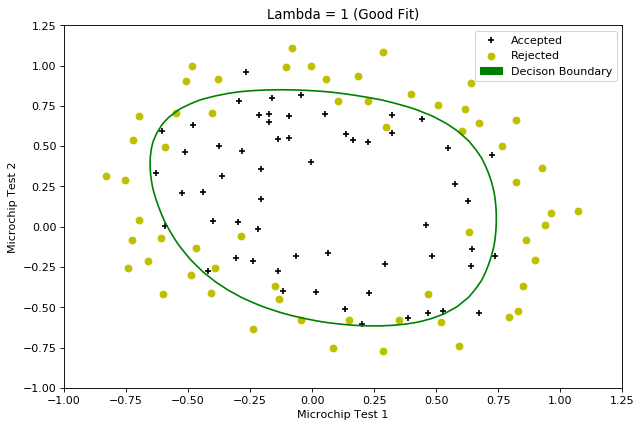

Accuracy on the Training Set 83.05 %


In [15]:
# Setting the Regularization Parameter lambda to 1 
lamb1 = 1
# Finding the optimum Parameter Theta
theta1 = find_min(init_theta,X_new,y,lamb1)
# Plotting the decision boundary
z1 = eval_z(u,v,theta1)
plotBoundary(X,y,xx,yy,z1)
plt.title("Lambda = 1 (Good Fit)")
plt.show()
# Computing the accuracy of the classifier on the Training Set
# Probabilities >= 0.5 are considered 1 and the rest 0
p = (X_new.dot(theta1) >= 0)
accuracy = np.mean(p == y)*100
print "Accuracy on the Training Set %s %%" % round(accuracy,2)

Optimization terminated successfully.
         Current function value: 0.224569
         Iterations: 546
         Function evaluations: 547
         Gradient evaluations: 547


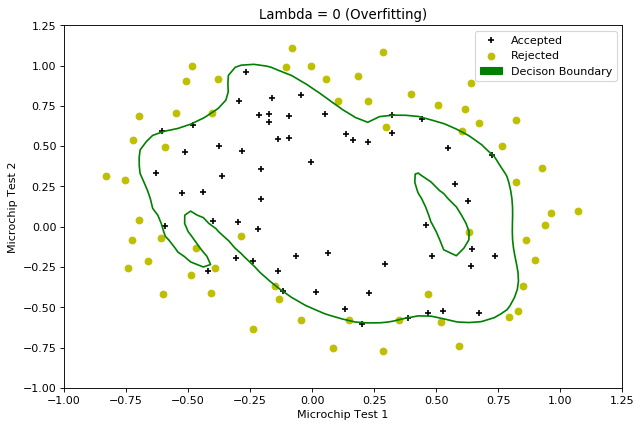

Accuracy on the Training Set 91.53 %


In [16]:
# Setting the Regularization Parameter lambda to 0
lamb0 = 0
# Finding the optimum Parameter Theta
theta0 = find_min(init_theta,X_new,y,lamb0)
# Plotting the decision boundary
z0 = eval_z(u,v,theta0)
plotBoundary(X,y,xx,yy,z0)
plt.title("Lambda = 0 (Overfitting)")
plt.show()
# Computing the accuracy of the classifier on the Training Set
# Probabilities >= 0.5 are considered 1 and the rest 0
p = (X_new.dot(theta0) >= 0)
accuracy = np.mean(p == y)*100
print "Accuracy on the Training Set %s %%" % round(accuracy,2)

Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8


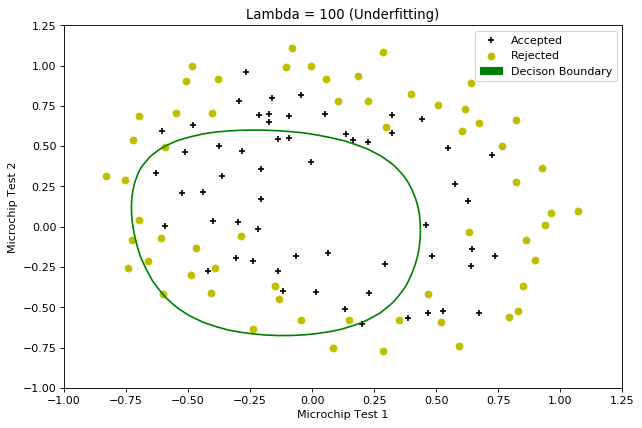

Accuracy on the Training Set 61.02 %


In [17]:
# Setting the Regularization Parameter lambda to 100
lamb_100 = 100
# Finding the optimum Parameter Theta
theta_100 = find_min(init_theta,X_new,y,lamb_100)
# Plotting the decision boundary
z_100 = eval_z(u,v,theta_100)
plotBoundary(X,y,xx,yy,z_100)
plt.title("Lambda = 100 (Underfitting)")
plt.show()
# Computing the accuracy of the classifier on the Training Set
# Probabilities >= 0.5 are considered 1 and the rest 0
p = (X_new.dot(theta_100) >= 0)
accuracy = np.mean(p == y)*100
print "Accuracy on the Training Set %s %%" % round(accuracy,2)